# Creacion del modelo

En notebook crearemos el modelo de bosques aleatorios con las caracteristicas que previamente comprobamos que ayudan a su optimo desempeño

In [1]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

df_model_wine = pd.read_csv("dataset/wine_ready.csv")

Contruyamos el modelo

In [2]:
# 1. Separar características y variable objetivo
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# 2. Obtener las 7 características más importantes (como paso previo necesario)
# Entrenamos un modelo temporal para obtener la importancia de las características
temp_model = RandomForestClassifier(n_estimators=170, max_depth=20, min_samples_leaf=1, random_state=42)
temp_model.fit(X, y)
importances = temp_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
top_7_features = feature_names[sorted_indices[:7]]

# 3. Crear el subconjunto de datos con las características óptimas
X_subset = X[top_7_features]

# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42, stratify=y)

# 5. Construir y entrenar el modelo final con los parámetros óptimos
rf_final_model = RandomForestClassifier(
    n_estimators=170,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42
)
rf_final_model.fit(X_train, y_train)

# 6. Realizar predicciones en el conjunto de prueba
y_pred = rf_final_model.predict(X_test)

# 7. Evaluar el modelo con métricas clave
print("--- Métricas de Evaluación del Modelo Final ---")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

--- Métricas de Evaluación del Modelo Final ---
Precisión (Accuracy): 0.8156
F1-Score (Weighted): 0.8158

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       149
           1       0.85      0.80      0.82       171

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320




Matriz de Confusión:


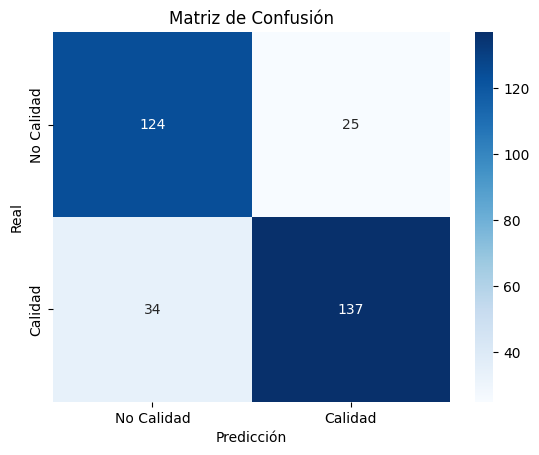

In [3]:
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Calidad', 'Calidad'], yticklabels=['No Calidad', 'Calidad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

**Tabla 1**

| Métrica                | Valor     | Descripción                                                                 |
|------------------------|-----------|-----------------------------------------------------------------------------|
| Precisión (Accuracy)   | 0.816     | Porcentaje de predicciones correctas sobre el total de muestras.            |
| F1-Score (Weighted)    | 0.816     | Media armónica entre precisión y exhaustividad, ponderada por clase.        |

**Tabla 2**

| Clase        | Precisión | Exhaustividad | F1-Score | Soporte |
|--------------|-----------|---------------|----------|---------|
| No Calidad   | 0.78      | 0.83          | 0.80     | 149     |
| Calidad      | 0.85      | 0.81          | 0.83     | 171     |

**Interpretación de la matriz de confusión:**

|                | Predicción: No Calidad | Predicción: Calidad |
|----------------|-----------------------|---------------------|
| Real: No Calidad   | 124                   | 25                  |
| Real: Calidad      | 34                    | 137                 |

- **124** vinos de "No Calidad" fueron correctamente clasificados.
- **137** vinos de "Calidad" fueron correctamente clasificados.
- **25** vinos de "No Calidad" fueron clasificados erróneamente como "Calidad".
- **34** vinos de "Calidad" fueron clasificados erróneamente como "No Calidad".

El modelo tiene buen desempeño, con mayor precisión en la clase "Calidad", aunque existen algunos falsos positivos y negativos.

#### Conclusiones del Modelo Inicial

En este notebook, hemos construido y evaluado nuestro primer modelo de Bosques Aleatorios optimizado. Hemos logrado un modelo con una precisión del 82% y un F1-Score ponderado de 0.82, lo que demuestra su sólida capacidad para clasificar la calidad del vino

1. Identificamos las principales variables predictoras para la calidad del vino.

2. Comprobamos la efectividad de los parámetros (n_estimators, max_depth, min_samples_leaf, etc.) mediante la visualización de su impacto en el rendimiento

3. Analizamos la matriz de confusión, revelando que, aunque el modelo tiene una alta confianza en sus predicciones, existen oportunidades de mejora al reducir los falsos positivos y falsos negativos

Estos resultados son un gran logro, pero para asegurarnos de que el modelo sea robusto y que los parámetros que encontramos sean verdaderamente óptimos, necesitamos un enfoque más riguroso y para ello usaremos la validacion cruzada